In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd


In [2]:
data=pd.read_json('../data/cars.json')

In [3]:
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [4]:
data['year']=pd.to_datetime(data.Year).dt.year
data=data.dropna()

In [5]:
data.dtypes

Acceleration        float64
Cylinders             int64
Displacement        float64
Horsepower          float64
Miles_per_Gallon    float64
Name                 object
Origin               object
Weight_in_lbs         int64
Year                 object
year                  int64
dtype: object

In [6]:
X=data.select_dtypes(exclude=['object']).drop(['Cylinders', 'Horsepower'], axis=1)
X.head()

,Acceleration,Displacement,Miles_per_Gallon,Weight_in_lbs,year
0,12.0,307.0,18.0,3504,1970
1,11.5,350.0,15.0,3693,1970
2,11.0,318.0,18.0,3436,1970
3,12.0,304.0,16.0,3433,1970
4,10.5,302.0,17.0,3449,1970


In [7]:
X.head()

,Acceleration,Displacement,Miles_per_Gallon,Weight_in_lbs,year
0,12.0,307.0,18.0,3504,1970
1,11.5,350.0,15.0,3693,1970
2,11.0,318.0,18.0,3436,1970
3,12.0,304.0,16.0,3433,1970
4,10.5,302.0,17.0,3449,1970


In [8]:
X.describe()

,Acceleration,Displacement,Miles_per_Gallon,Weight_in_lbs,year
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,15.541327,194.411990,23.445918,2977.584184,1976.051020
std,2.758864,104.644004,7.805007,849.402560,3.788858
min,8.000000,68.000000,9.000000,1613.000000,1970.000000
25%,13.775000,105.000000,17.000000,2225.250000,1973.000000
50%,15.500000,151.000000,22.750000,2803.500000,1976.000000
75%,17.025000,275.750000,29.000000,3614.750000,1979.000000
max,24.800000,455.000000,46.600000,5140.000000,1982.000000


# Estimate clusters

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#y_kmeans

In [10]:
data['cluster']=y_kmeans
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,year,cluster
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01,1970,0
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01,1970,1
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01,1970,0
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01,1970,0
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01,1970,0


In [11]:
data.groupby('cluster').mean()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,year
cluster,,,,,,,
0,15.904098,5.819672,212.614754,105.401639,20.789344,3162.581967,1976.418033
1,13.463333,7.866667,344.144444,157.811111,14.635556,4236.322222,1974.022222
2,16.334444,4.038889,107.208333,77.166667,29.651667,2222.827778,1976.816667


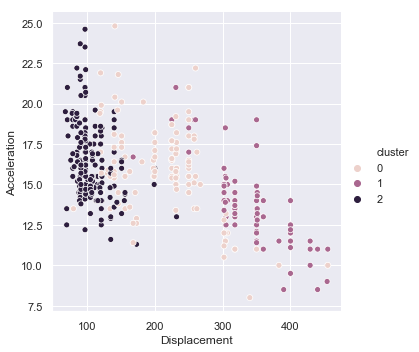

In [12]:
sns.relplot(y='Acceleration', x='Displacement', hue='cluster', data=data)

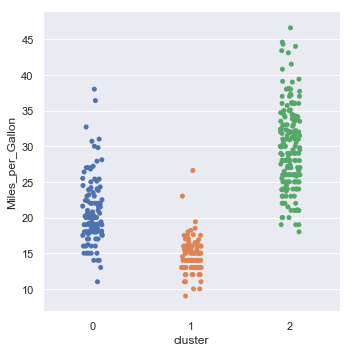

In [13]:
sns.catplot(y='Miles_per_Gallon', x='cluster', data=data)

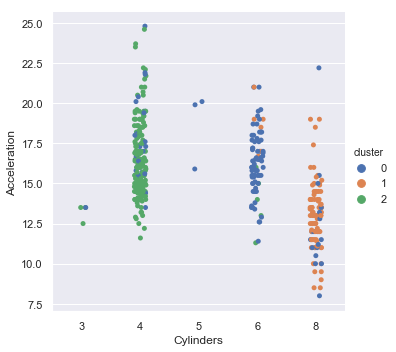

In [14]:
sns.catplot(y='Acceleration', x='Cylinders', hue='cluster', data=data)

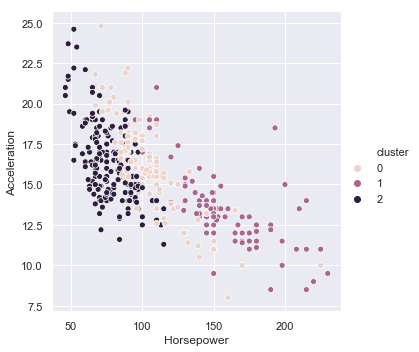

In [15]:
#plt.figure(figsize=(2,3))
sns.relplot(y='Acceleration', x='Horsepower', hue='cluster', data=data)

In [16]:
sns.relplot?